variable(0.8473695850105871)
variable(0.2514286285183606)
variable(0.24759485466749864)
variable(0.2378612044705481)
variable(0.21222231333102917)
variable(0.16742181117834146)
variable(0.0968193261999265)
variable(0.07849528290602333)
variable(0.07749729552991155)
variable(0.07722132399559314)


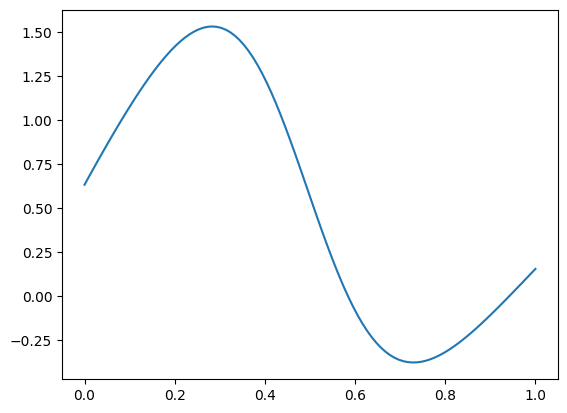

In [1]:
import numpy as np
from dezero import Variable
import dezero.functions as F

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

# initialize weights
I, H, O = 1, 10, 1 # input hidden output layers
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))

W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid_simple(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr*W1.grad.data
    b1.data -= lr*b1.grad.data
    W2.data -= lr*W2.grad.data
    b2.data -= lr*b2.grad.data
    if i % 1000 == 0:
        print(loss)

# plot to check how well the nn fit to toy sin() data
import matplotlib.pyplot as plt
x_t = np.linspace(0,1,100).reshape(100,1)
y_pred = predict(x_t).data

# pretty well indeed
plt.plot(x_t, y_pred)


### `Layer` class test

In [3]:
# layer class
import numpy as np
from dezero import Variable
import dezero.functions as F
from dezero import Parameter
from dezero.layers import Layer

layer = Layer()
layer.p1 = Parameter(np.array(1))
layer.p2 = Parameter(np.array(2))
layer.p3 = Variable(np.array(3))
layer.p4 = 'test'

print(layer._params)
'''
out:
{'p2', 'p1'}
'''

for name in layer._params:
    print(name, layer.__dict__[name])



{'p1', 'p2'}
p1 variable(1)
p2 variable(2)


### 使用Linear类实现神经网络：

In [4]:
#%%
import numpy as np
from dezero import Variable, Layer
from dezero.models import Model
import dezero.functions as F
import dezero.layers as L


# toy data
np.random.seed(0)
x = np.random.rand(100,1)
y = np.sin(2*np.pi*x) + np.random.rand(100,1)

# (old)assign out_size to Linear layer
# l1 = L.Linear(10)
# l2 = L.Linear(1)

# 将Layer作为参数加入Layer的_params中后，我们就可以把作为Layer的Linear实例（L.Linear)传入Layer的实例model的_params中统一管理
model = Layer()
model.l1 = L.Linear(5)
model.l2 = L.Linear(3)

# 定义网络结构：
def predict(model, x):
    # 所有的参数都在model中统一管理
    y = model.l1(x)
    y = F.sigmoid_simple(y)
    y = model.l2(y)
    return y

# 测试访问所有参数并重置所有参数的梯度：
for p in model.params():
    #由于params()是yield构造的生成器，因此需要逐个访问
    print(p)

model.cleargrads()

lr = 0.2
iters = 1000

for i in range(iters):
    y_pred = predict(model, x)
    loss = F.mean_squared_error(y, y_pred)

    # l1.cleargrads()
    # l2.cleargrads()
    model.cleargrads()
    loss.backward()

    
    for p in model.params():
        p.data -= lr*p.grad.data

    if i % 100 == 0:
        print(loss)


variable([0. 0. 0. 0. 0.])
variable(None)
variable([0. 0. 0.])
variable(None)
variable(2.1085010410910483)
variable(0.7830999831433312)
variable(0.741839976546367)
variable(0.7344466963310486)
variable(0.7282170690813982)
variable(0.7219737288013254)
variable(0.7151031894262673)
variable(0.7072330611350139)
variable(0.6981425150188675)
variable(0.6877230785745242)


### 将上面的步骤抽象为一种更便捷的方法：将模型定义为一个继承Layer类的类：

In [5]:

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        #定义模型的网络结构
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

# toy data: our old friend sin()
np.random.seed(0)
x = np.random.rand(100,1)
y = np.sin(2*np.pi*x) + np.random.rand(100,1)

hidden_size = 5
out_size = 3
lr = 0.2
iters = 1000
model = TwoLayerNet(hidden_size,out_size)
model.plot(x)
# model.cleargrads()

for i in range(iters):
    #forward
    y_pred = model(x)
    # cal loss
    loss = F.mean_squared_error(y, y_pred)
    #cleargrads before backwards
    model.cleargrads()
    loss.backward()
    #更新模型参数
    for p in model.params():
        p.data -= lr*p.grad.data

    if i % 100 == 0:
        print(loss)


cmd: cd /d D:\graphviz\bin&dot C:\Users\xuguy\.dezero\tmp_graph.dot -T png -o model.png
variable(2.1085010410910483)
variable(0.7830999831433312)
variable(0.741839976546367)
variable(0.7344466963310488)
variable(0.7282170690813982)
variable(0.7219737288013254)
variable(0.7151031894262673)
variable(0.7072330611350139)
variable(0.6981425150188673)
variable(0.6877230785745243)


![title](img/model.png)

### 测试 MLP模型



In [6]:
import numpy as np
from dezero import Variable, Layer
from dezero.models import Model, MLP
import dezero.functions as F
import dezero.layers as L
model = MLP((10,20,30,40,1)) #5层（4个hidden1 个out）
# 在传入数据前模型不会初始化参数，参数全都是None
# next(model.params())

# 传入toy data
np.random.seed(0)
x = np.random.rand(100,1)
y_pred = model(x)
print(y_pred)
model._params #{'l0', 'l1', 'l2', 'l3', 'l4'}
model.__dict__['l0'].W.shape # (1, 10)


for i, w in enumerate(model.params()):
    print(f'{i}-{w.shape}: {w}')

variable([[0.07108538]
          [0.07161369]
          [0.0712646 ]
          [0.07107203]
          [0.07064234]
          [0.07140248]
          [0.07069343]
          [0.07209376]
          [0.07226566]
          [0.07049259]
          [0.071832  ]
          [0.07101736]
          [0.07115011]
          [0.07217629]
          [0.06924527]
          [0.06931165]
          [0.06903548]
          [0.07194221]
          [0.07179445]
          [0.07203908]
          [0.07229976]
          [0.07185237]
          [0.07078005]
          [0.07180105]
          [0.06943986]
          [0.07138367]
          [0.06954276]
          [0.07222153]
          [0.07099306]
          [0.07060914]
          [0.07003226]
          [0.0717835 ]
          [0.07076084]
          [0.07115141]
          [0.06902959]
          [0.07131269]
          [0.07129485]
          [0.07131044]
          [0.07221937]
          [0.07151358]
          [0.07040193]
          [0.0706914 ]
          [0.07156138]
          [

### 测试__setattr__以及__dicit__的行为

In [7]:

#%%
class nametest:
    def __init__(self, name='name1'):
        self.name = name

tmp = nametest()
tmp.__dict__ # out: {'name': 'name1'}

# 从上面这个例子可以看出，实例tmp的所有变量的值都会被__setattr__以{name:value}的形式存到__dict__中



{'name': 'name1'}

### `Set` 带来的`.params()`遍历取出`parameters`的随机性 

- `yield from`的作用是从一个`iter`中生成另一个`iter`对象，嵌套递归，把所有可能的`parameter`逐个取出
- 当set中有不同的数据结构时，会产生随机性:每次重启kernel都不一样

- 你需要用交互模式运行下面的内容
- 每次重新启动kernel，`yield from`遍历`iterator`的顺序都是不一样的

In [10]:
tmp2 = iter(set([1,3,2,4,'5','6']))
next(tmp2)
tmp = set([1,3,2,4,'5','6'])

def fun(tmp):
    for i in tmp:
        print(i)
        yield i

def func(tmp):
    for i in tmp:
        print(i)
        yield from fun(tmp)

tmp3 = func(tmp)
next(tmp3)

6
6


'6'

### 使用 `dezero/optimizers.py` 中实现的SGD解决问题

In [3]:
import numpy as np
from dezero import Variable, optimizers
import dezero.functions as F
from dezero.models import MLP

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

lr = 0.2
max_iter = 1000
hidden_size = 10

model = MLP((hidden_size, 1))

# optimizer = optimizers.SGD(le)
optimizer = optimizers.MomentumSGD(lr)
optimizer.setup(model)
# or equivalently:
# optimizer = optimizers.SGD(lr).setup(model)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)
    model.cleargrads()
    loss.backward()

    optimizer.update()
    if i % 100 == 0:
        print(loss)


variable(0.8165178479901415)
variable(0.2521950747242885)
variable(0.2504242377295966)
variable(0.2479233160773438)
variable(0.24329152231523804)
variable(0.23307035987608468)
variable(0.2055474018926681)
variable(0.13312454541584906)
variable(0.0817534055439662)
variable(0.07781429408029678)


In [4]:
p = next(model.params())



In [6]:
id(p)

2511148658752

In [18]:
# module type (cuda or np) test
import numpy as np

gx = np.zeros((2,3))
isinstance(gx, np.ndarray)
assert isinstance(gx, float), 'gy must be np.ndarray'

AssertionError: gy must be np.ndarray

In [1]:
# test with get_item function
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1,2,3],[4,5,6]]))
y = F.get_item(x, 1)
y.backward()
print(f'{y}\n{x.grad}')


variable([4 5 6])
variable([[0 0 0]
          [1 1 1]])


In [2]:
# 多次提取同一组元素
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
indices = np.array([0, 0, 1])
y = F.get_item(x, indices)
print(y)

variable([[1 2 3]
          [1 2 3]
          [4 5 6]])


In [3]:
# 重写Variable类中的__getitem__特殊方法，让get_item函数也可以在Variable类型上使用
# 或者直接在dezero.core.py中改写setup_variable
Variable.__getitem__ = F.get_item

# 行为和np.ndarray的切片一致
y = x[1]
print(y)
y = x[:,2]
print(y)

variable([4 5 6])
variable([3 6])


In [4]:
from dezero import Variable, as_variable
import dezero.functions as F
from dezero.models import MLP
def softmaxld(x):
    # x = as_variable(x)
    y = F.exp(x)
    sum_y = F.sum(y)
    return y/sum_y

model = MLP((10, 3)) # 2 layer fc layer

In [5]:
# x = Variable(np.array([[0.2, -0.4]]))
x = np.array([[0.2, -0.4]])
y = model(x)
p = softmaxld(y)

print(y)
# print(p)

variable([[-0.05369075  0.74685377 -0.00334219]])


In [6]:
p.backward(retain_grad=True)
y.grad # 

variable([[-7.89139711e-17 -1.75721930e-16 -8.29888980e-17]])

In [1]:
# 测试softmax与cross_entropy_loss
from dezero import Variable, as_variable
import dezero.functions as F
from dezero.models import MLP
import numpy as np
np.random.seed(0)
model = MLP((10, 3))
x = np.array([[0.2, -0.4], [0.3, 0.5], [1.3, -3.2], [2.1, 0.3]])

t = np.array([2, 0, 1, 0])
y = model(x)
loss = F.softmax_cross_entropy(y, t)
print(loss)

variable(1.4967442462341742)


In [13]:
# 测试 Max()定义中的反向传播掩码cond的shape
x = Variable(np.random.rand(10,3))
y = x.max(axis = 1, keepdims = True)
y.shape # shape (10, 1)
cond = (x.data == y.data)
cond.shape #shape (10, 1) be broadcast to shape (10, 3)
cond.ravel().shape

x2 = np.random.rand(10,1)
x2.shape # (10, 1)
x2.ravel().shape #(10, 0)
t.ravel().shape


(4,)

In [2]:
# 螺旋数据集 （step 48）
import numpy as np


In [3]:
import math
import numpy as np
import dezero
print(f'dezero loaded from: {dezero.__path__}')
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

max_epoch = 100
print_every = 10

batch_size = 30
hidden_size = 10

assert print_every >=1 , 'print_every must larger than 1'
lr = 1.0

# load data
# first transform data
def f(x):
    y = x / 2.0
    return y

train_set = dezero.datasets.Spiral(transform = f)

print(f'train_set shape: {train_set.data.shape}, label shape: {train_set.label.shape}')
print(f'data example: {train_set[0]}')

# 2 layer fc nn, 3 classes
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)



dezero loaded from: ['d:\\GITrepo\\LLM-from-scratch\\dezero']
train_set shape: (300, 2), label shape: (300,)
data example: (array([-0.06990694, -0.00360829], dtype=float32), np.int32(1))


In [20]:
data_size = len(train_set)
max_iter = math.ceil(data_size / batch_size)
np.random.seed(0)
for epoch in range(max_epoch):

    # 随机打乱所有index
    
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        # 等距切分打乱后的index
        batch_index = index[i*batch_size : (i+1)*batch_size]

        # 小批量地读入数据用于训练，防止内存被冲爆
        batch = [train_set[i] for i in batch_index]
        batch_x = np.array([example[0] for example in batch])
        batch_t = np.array([example[1] for example in batch])

        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        # 求所有数据的loss总和，并非batch loss
        sum_loss += float(loss.data) * len(batch_t)

    avg_loss = sum_loss / data_size
    if epoch % print_every == print_every-1 :
        print(f'epoch: {epoch+1}, epoch_avg_loss: {avg_loss:.2f}')

epoch: 10, epoch_avg_loss: 0.79
epoch: 20, epoch_avg_loss: 0.74
epoch: 30, epoch_avg_loss: 0.73
epoch: 40, epoch_avg_loss: 0.72
epoch: 50, epoch_avg_loss: 0.69
epoch: 60, epoch_avg_loss: 0.63
epoch: 70, epoch_avg_loss: 0.57
epoch: 80, epoch_avg_loss: 0.49
epoch: 90, epoch_avg_loss: 0.40
epoch: 100, epoch_avg_loss: 0.34


In [1]:
# 测试 Datasets 类
import dezero

train_set = dezero.datasets.Spiral(train = True)
print(train_set[0])
print(len(train_set))

(array([-0.13981389, -0.00721657], dtype=float32), np.int32(1))
300


In [4]:
# dataloader class test
from dezero.datasets import Spiral
from dezero import DataLoader

batch_size = 10
max_epoch = 1

train_set = Spiral(train = True)
test_set = Spiral(train = False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle = False)

for epoch in range(max_epoch):
    for x, t in train_loader:
        print(x.shape, t.shape)
        # break: 截断输出，只输出1个用作展示
        break
    for x, t in test_loader:
        print(x.shape, t.shape)
        break

(10, 2) (10,)
(10, 2) (10,)


In [1]:
# test with accuracy
import numpy as np
import dezero.functions as F

y = np.array([[0.2, 0.8, 0. ], [0.1, 0.9, 0], [0.8, 0.1, 0.1]])
t = np.array([1, 2, 0])
acc = F.accuracy(y, t)
print(acc)

variable(0.6666666666666666)


In [2]:
# use Spiral data to train a MLP
import math
import numpy as np
import dezero
import dezero.datasets
print(f'dezero loaded from: {dezero.__path__}')
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

max_epoch = 300
print_every = 10

batch_size = 30
hidden_size = 10

assert print_every >=1 , 'print_every must larger than 1'
lr = 1.0

# load data
train_set = dezero.datasets.Spiral(train = True)
test_set = dezero.datasets.Spiral(train = False)
train_loader = dezero.DataLoader(train_set, batch_size)
test_loader = dezero.DataLoader(test_set, batch_size, shuffle = False)

print(f'train_set shape: {train_set.data.shape}, label shape: {train_set.label.shape}')
print(f'data example: {train_set[0]}')

# 2 layer fc nn, 3 classes
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

dezero loaded from: ['d:\\GITrepo\\LLM-from-scratch\\dezero']
train_set shape: (300, 2), label shape: (300,)
data example: (array([-0.13981389, -0.00721657], dtype=float32), np.int32(1))


In [4]:
# training loop
data_size = len(train_set)
max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    # print training info
    avg_loss = sum_loss / data_size
    avg_acc = sum_acc / data_size
    if epoch % print_every == print_every-1 :
        print(f'epoch: {epoch+1}, train_avg_loss: {avg_loss:.2f}, test_avg_acc: {avg_acc:.2f}')

    sum_loss, sum_acc = 0, 0
    # print eval info
    with dezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data)
            sum_acc += float(acc.data) * len(t)
    
    # print eval(test) info
    avg_loss = sum_loss / data_size
    avg_acc = sum_acc / data_size
    if epoch % print_every == print_every-1 :
        print(f'test_avg_loss: {avg_loss:.2f}, test_avg_acc: {avg_acc:.2f}')

epoch: 10, train_avg_loss: 0.27, test_avg_acc: 0.93
test_avg_loss: 0.01, test_avg_acc: 0.89
epoch: 20, train_avg_loss: 0.24, test_avg_acc: 0.92
test_avg_loss: 0.01, test_avg_acc: 0.92
epoch: 30, train_avg_loss: 0.21, test_avg_acc: 0.92
test_avg_loss: 0.01, test_avg_acc: 0.90
epoch: 40, train_avg_loss: 0.20, test_avg_acc: 0.93
test_avg_loss: 0.01, test_avg_acc: 0.92
epoch: 50, train_avg_loss: 0.19, test_avg_acc: 0.92
test_avg_loss: 0.01, test_avg_acc: 0.91
epoch: 60, train_avg_loss: 0.17, test_avg_acc: 0.94
test_avg_loss: 0.01, test_avg_acc: 0.93
epoch: 70, train_avg_loss: 0.17, test_avg_acc: 0.94
test_avg_loss: 0.01, test_avg_acc: 0.93
epoch: 80, train_avg_loss: 0.15, test_avg_acc: 0.95
test_avg_loss: 0.01, test_avg_acc: 0.94
epoch: 90, train_avg_loss: 0.15, test_avg_acc: 0.95
test_avg_loss: 0.01, test_avg_acc: 0.93
epoch: 100, train_avg_loss: 0.14, test_avg_acc: 0.95
test_avg_loss: 0.01, test_avg_acc: 0.94


In [1]:
# MNIST dataset
import dezero
train_set = dezero.datasets.MNIST(train = True, transform = None)
test_set = dezero.datasets.MNIST(train = False, transform = None)


In [4]:
print(len(train_set))
import matplotlib.pyplot as plt

x, t = train_set[0]
print(type(x), x.shape)
print(t)

60000
<class 'numpy.ndarray'> (1, 28, 28)
5


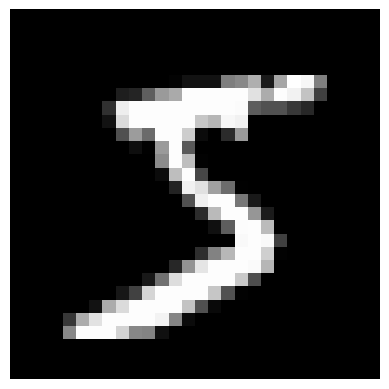

In [5]:
plt.imshow(x.reshape(28, 28), cmap = 'gray')
plt.axis('off')
plt.show()

In [2]:
# start training a NN

import math
import numpy as np
import dezero
import dezero.datasets
print(f'dezero loaded from: {dezero.__path__}')
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP
# def transform function to preprocess

def f(x):
    x = x.flatten()
    x = x.astype(np.float32)
    x /= 255.0
    return x

# setup hyper-params

max_epoch = 5
print_every = 1

batch_size = 100
hidden_size = 1000
lr = 1.0

train_set = dezero.datasets.MNIST(train = True, transform = f)
test_set = dezero.datasets.MNIST(train=False, transform = f)
train_loader = dezero.DataLoader(train_set, batch_size)
test_loader = dezero.DataLoader(test_set, batch_size, shuffle = False)

dezero loaded from: ['d:\\GITrepo\\LLM-from-scratch\\dezero']


In [7]:
# training loop
assert print_every >=1 , 'print_every must larger than 1'

model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
optimizer = optimizers.MomentumSGD().setup(model)

# max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    # print training info
    avg_loss = sum_loss / len(train_set)
    avg_acc = sum_acc / len(train_set)
    if epoch % print_every == print_every-1 :
        print(f'epoch: {epoch+1}, train_avg_loss: {avg_loss:.4f}, train_avg_acc: {avg_acc:.4f}')

    sum_loss, sum_acc = 0, 0
    # print eval info
    with dezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)
    
    # print eval(test) info
    avg_loss = sum_loss / len(test_set)
    avg_acc = sum_acc / len(test_set)
    if epoch % print_every == print_every-1 :
        print(f'test_avg_loss: {avg_loss:.4f}, test_avg_acc: {avg_acc:.4f}')

epoch: 1, train_avg_loss: 0.4034, train_avg_acc: 0.8903
test_avg_loss: 0.2049, test_avg_acc: 0.9417
epoch: 2, train_avg_loss: 0.1753, train_avg_acc: 0.9500
test_avg_loss: 0.1400, test_avg_acc: 0.9589
epoch: 3, train_avg_loss: 0.1223, train_avg_acc: 0.9646
test_avg_loss: 0.1231, test_avg_acc: 0.9606
epoch: 4, train_avg_loss: 0.0930, train_avg_acc: 0.9737
test_avg_loss: 0.0898, test_avg_acc: 0.9729
epoch: 5, train_avg_loss: 0.0742, train_avg_acc: 0.9785
test_avg_loss: 0.0864, test_avg_acc: 0.9717
